In [0]:
# Generic Imports
import tensorflow as tf # TensorFlow is the basic library
import numpy as np # Math manipulation library

# Image viewing / graphing library
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 

# Tensorflow.Keras has useful functions for neural networks
# (layers, connections, optimizers, etc.)
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Import our dataset
from tensorflow.keras.datasets import mnist

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
5
35.108418367346935


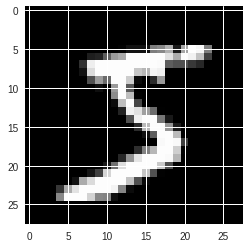

In [18]:
# Load the dataset (TensorFlow provides it easily with auto-download feature)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# View data format
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

# Visualize one sample
print(y_train[0])
plt.imshow(x_train[0], cmap="gray")

# See the mean of the image (need to scale now)
print(np.mean(x_train[0].flatten()))

In [19]:
x_train = (x_train / 127.5) - 1.0 # Scales from [0, 255] to [-1.0, 1.0]
x_test = (x_test / 127.5) - 1.0 # Scales from [0, 255] to [-1.0, 1.0]
print(np.mean(x_train[0].flatten()))

-0.724639855942377


In [20]:
print(y_train[0])

5


In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])
print(np.argmax(y_train[0]))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.005), metrics=["accuracy"])

In [28]:
model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
60000/60000 [==============================] - 31s 520us/step - loss: 2.8823 - acc: 0.8199
Epoch 2/50
13888/60000 [=====>........................] - ETA: 23s - loss: 2.8870 - acc: 0.8199

KeyboardInterrupt: ignored

In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 157us/step


[2.8751835189819337, 0.8206400062561036]